<a href="https://colab.research.google.com/github/beginnoob/Model-Collection/blob/main/Tugas_Ahmad_Syaefudin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Pemberian review negatif dan positif (binary-clasification) mungkin bisa diakibatkan oleh beberapa faktor di luar keuangan, contohnya umur ataupun status pernikahan mungkin? nah disini kita akan kulik beberapa pengaruh faktor-faktor tersebut menggunakan beberapa model
## Tujuan Penelitian
untuk mengetahui model apakah yang cocok untuk menganalisa background pedidikan, penghasilan,status,umur,gender berpengaruh terhadap feedback dalam food delivery order
## Rumusan Masalah
Model manakah yang cocok untuk menganalisa food delivery order tersebut?
## Data yang akan dipakai
Nama : Online Food Dataset
Desc : The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..
Link_source : https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset

nb* sebenarnya dataset ini lebih mengarah clustering secara demografi tapi saya hanya menggunakan beberapa kolom data sehingga jadi binary clasification untuk melihat pengaruh dari background seseorang dengan review negatif atau positif.
## Metode
(tulis di sini)

# Preparation | Persiapan
## Import Libraries

In [ ]:
#import library yang diperlukan saat ini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data | Mendapatkan Data

In [ ]:
#membaca dataset melalui file internal pc saya, sekalian ditampilkan
df=pd.read_csv("/content/onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


## Explore Data (EDA) | Eksplorasi Data

In [ ]:
#melihat jumlah data,dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [ ]:
#Melihat ada macam data setiap kolom
df.nunique()

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
Unnamed: 12                    2
dtype: int64

In [ ]:
#Melihat apakah ada data kosong
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

## Clean Data | Membersihkan Data

In [ ]:
"""
pertama saya akan mengubah tipe data object menjadi integer
dari df.nunique() diatas untuk tipe data object tidak terlalu memiliki perbedaan jumlah object yang banyak
"""
from sklearn.preprocessing import LabelEncoder
encode =LabelEncoder()

df['Gender']= encode.fit_transform(df['Gender'].values)
df['Marital Status']= encode.fit_transform(df['Marital Status'].values)
df['Occupation']= encode.fit_transform(df['Occupation'].values)
df['Educational Qualifications']= encode.fit_transform(df['Educational Qualifications'].values)
df['Monthly Income']= encode.fit_transform(df['Monthly Income'].values)
df['Feedback']= encode.fit_transform(df['Feedback'].values)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,Yes,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,3,4,2,2,12.9766,77.5993,560001,Yes,1,Yes
384,23,0,2,3,4,2,4,12.9854,77.7081,560048,Yes,1,Yes
385,22,0,2,3,4,2,5,12.9850,77.5533,560010,Yes,1,Yes
386,23,1,2,3,2,2,2,12.9770,77.5773,560009,Yes,1,Yes


In [ ]:
#saya mau menghilangkan beberapa kolom yang tidak akan saya pakai
df.drop(columns=["latitude","longitude","Output","Unnamed: 12"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         388 non-null    int64
 1   Gender                      388 non-null    int64
 2   Marital Status              388 non-null    int64
 3   Occupation                  388 non-null    int64
 4   Monthly Income              388 non-null    int64
 5   Educational Qualifications  388 non-null    int64
 6   Family size                 388 non-null    int64
 7   Pin code                    388 non-null    int64
 8   Feedback                    388 non-null    int64
dtypes: int64(9)
memory usage: 27.4 KB


In [ ]:
#melihat data duplicate
df.duplicated().sum()

103

In [ ]:
#menghapus data duplicate, meskipun banyak 😭
df.drop_duplicates(inplace=True)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Feedback
0,20,0,2,3,4,2,4,560001,1
1,24,0,2,3,2,0,3,560009,1
2,22,1,2,3,2,2,3,560017,0
3,22,0,2,3,4,0,6,560019,1
4,22,1,2,3,2,2,4,560010,1
...,...,...,...,...,...,...,...,...,...
355,21,1,2,3,4,0,2,560046,1
363,31,1,0,0,3,1,3,560085,1
369,30,1,0,0,3,2,6,560095,1
374,21,1,2,3,4,0,3,560092,0


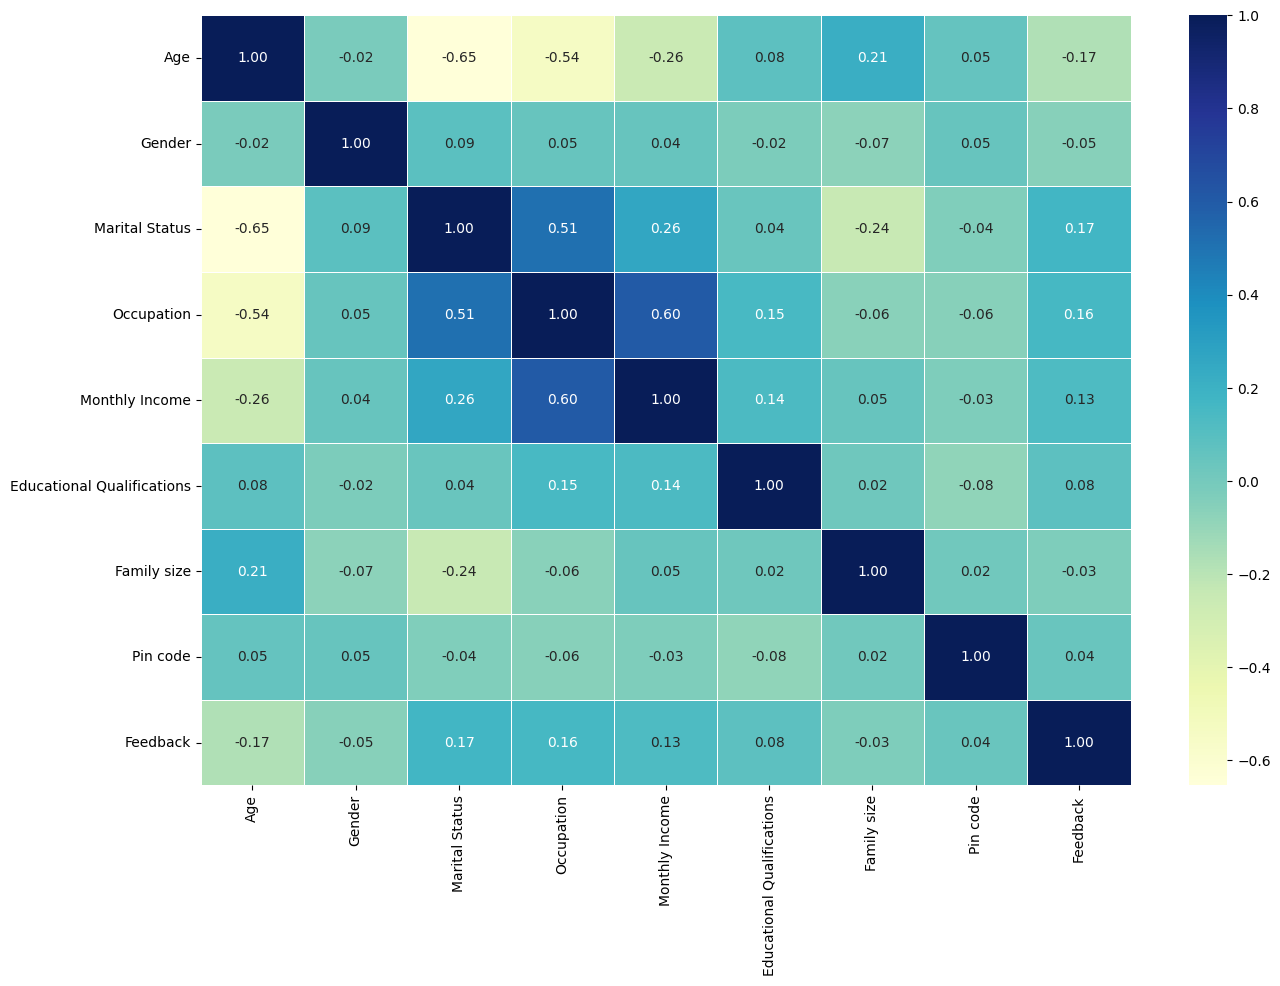

In [ ]:
#Melihat korelasi antar tabel
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Model Training | Pelatihan Model

In [ ]:
#pendeklarasian variabel
X = df.drop("Feedback", axis=1)
y = df["Feedback"]

In [ ]:
#import library
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,  #independent variables
    y,  # dependent variable
    test_size=0.2) # menggunakan 20%


In [ ]:
#import library model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# bikin dictionary model
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes" :GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(random_state=0)
}


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
#menampilkan score dari setiap model
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

{'KNN': 0.8070175438596491,
 'Logistic Regression': 0.8771929824561403,
 'Random Forest': 0.8245614035087719,
 'Naive Bayes': 0.8771929824561403,
 'Decision Tree': 0.7368421052631579}

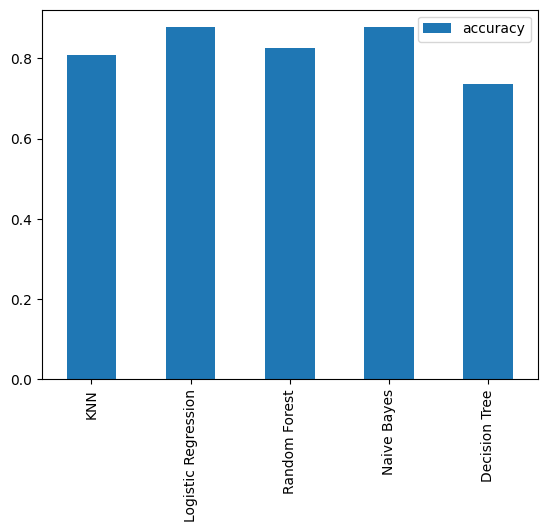

In [ ]:
#perbandingan model menggunakan diagram
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Model Evaluation | Evaluasi Model

In [ ]:
#import library
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# tunning LogisticRegression karena memiliki akurasi yang cukup tinggi

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8771929824561403

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.array(y_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

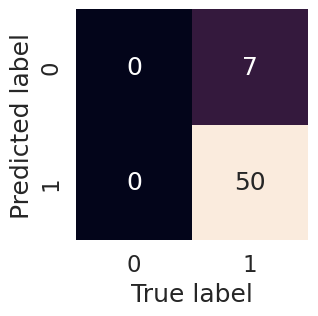

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

ternyata data false positive masih ada bahkan banyak, saya belum faham cara mengurangi hal tersebut 🙏

In [ ]:
#evaluasi dengan clasification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.88      1.00      0.93        50

    accuracy                           0.88        57
   macro avg       0.44      0.50      0.47        57
weighted avg       0.77      0.88      0.82        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [ ]:
# Cross-validates accuracy
from sklearn.model_selection import  cross_val_score

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.8245614 , 0.80701754, 0.80701754, 0.80701754, 0.80701754])

In [ ]:
#menggunakan rata-ratanya
cv_acc = np.mean(cv_acc)
cv_acc

0.8105263157894737

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8105263157894737

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

1.0

In [ ]:
# Cross_validated F1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8953323375653472

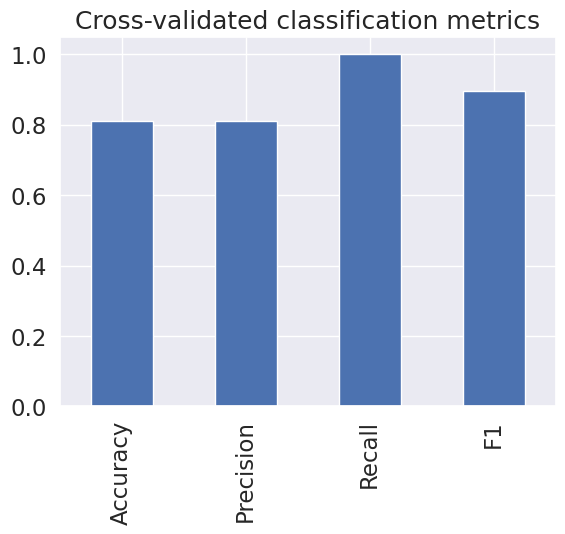

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

## Model Selection | Pemilihan Model

Berhubung saya hanya menggunakan evaluasi dari model logistic regresion saja saya memilih model tersebut karena memiliki accurasi yang cukup tinggi dibanding mode lainnya

## Conclusion | Kesimpulan

Model logistic regression dan naive bayes memiliki akurasi yang sama di binary clasification dalam projek ini, berhubung saya mengerjakan mepet banget dan keterbatasan saya dalam memahami data serta coding yang diperlukan untuk setiap langkahnya, saya tahu masih ada beberapa kesalahan, bahkan false positif, serta ada imbalanced data
🙏🙏🙏🙏🙏🙏